<a href="https://colab.research.google.com/github/shrutishrinivasan/Introduction-to-IoT/blob/main/CIA_II_Iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Preprocessing and loading the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("temp.csv")
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [4]:
# filling missing values in the dataset
df.fillna(method='bfill',inplace=True)

In [5]:
df.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [6]:
df['DATE'][0]

'1/1/2014'

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'][0]             

Timestamp('2014-01-01 00:00:00')

In [8]:
# setting the date column itself as index
df = df.set_index(["DATE"])
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


**Visual Analysis by plotting graphs**

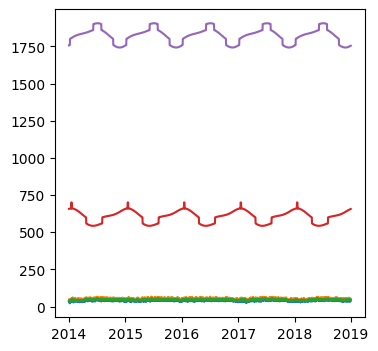

In [9]:
plt.figure(figsize=(4,4))
plt.plot(df)
plt.show()

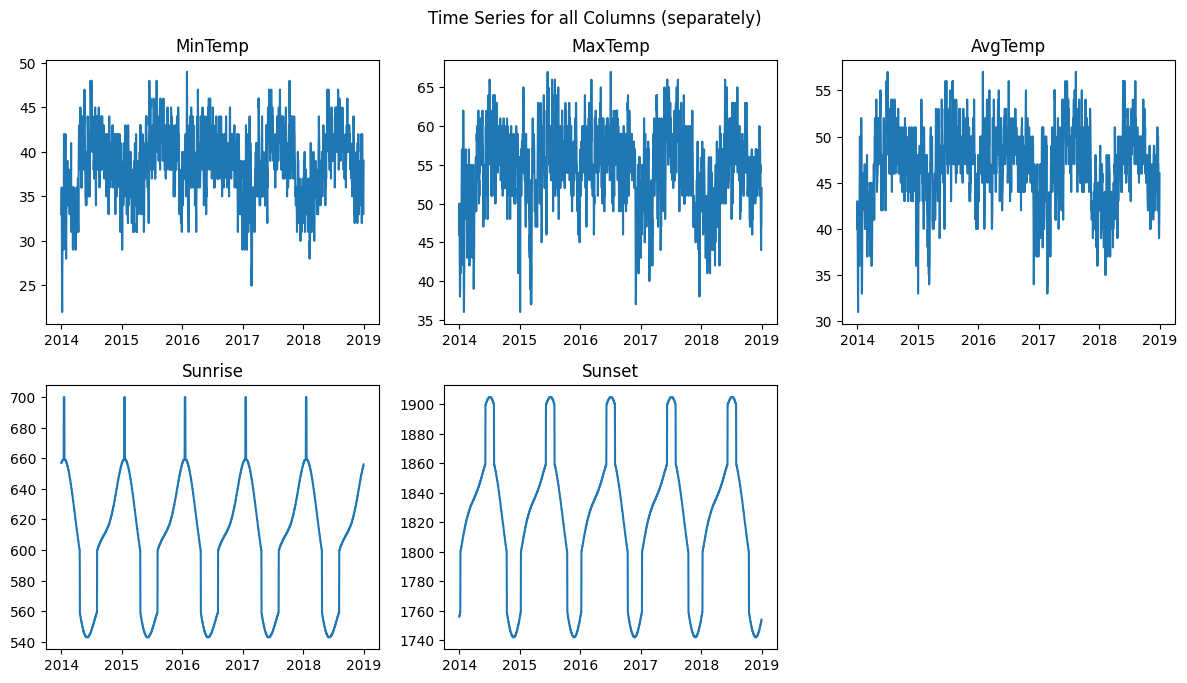

In [10]:
plt.figure(figsize=(12,10))
plt.suptitle("Time Series for all Columns (separately)")

plt.subplot(331)
plt.title("MinTemp")
plt.plot(df['MinTemp'])

plt.subplot(332)
plt.title("MaxTemp")
plt.plot(df['MaxTemp'])

plt.subplot(333)
plt.title("AvgTemp")
plt.plot(df['AvgTemp'])

plt.subplot(334)
plt.title("Sunrise")
plt.plot(df['Sunrise'])

plt.subplot(335)
plt.title("Sunset")
plt.plot(df['Sunset'])

plt.tight_layout()

**ETS Decomposition of 'AvgTemp' column**

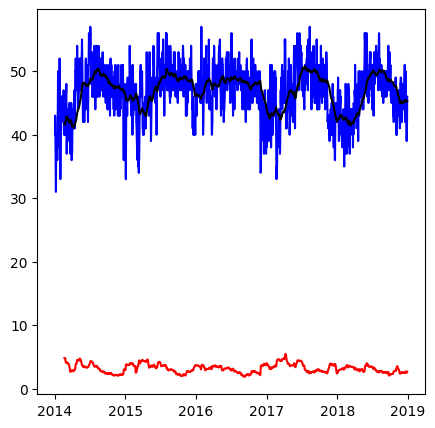

In [11]:
rol_mean = df['AvgTemp'].rolling(window=50).mean() # mean
rol_std = df['AvgTemp'].rolling(window=50).std() #standard deviation

plt.figure(figsize=(5,5))
plt.plot(df['AvgTemp'],c='blue')
plt.plot(rol_mean,c='black')
plt.plot(rol_std,c='red')

In [12]:
# for p-values in the dataset
dftest = adfuller(df['AvgTemp'])
print(dftest)

(-6.596796619028829, 6.893094606591013e-09, 12, 1812, {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}, 8163.343598857468)


In [13]:
def adf_test(dataset):
  dft = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dft[0])
  print("2. P-Value : ", dft[1])
  print("3. Num Of Lags : ", dft[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dft[3])
  print("5. Critical Values :")
  for key, val in dft[4].items():
      print("\t",key, ": ", val)
        
adf_test(df['AvgTemp'])

1. ADF :  -6.596796619028829
2. P-Value :  6.893094606591013e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1812
5. Critical Values :
	 1% :  -3.4339640110318004
	 5% :  -2.8631363845692475
	 10% :  -2.567619862152732


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
stepwise_fit = auto_arima(df['AvgTemp'], suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4146.175
Date:                Fri, 14 Apr 2023   AIC                           8308.349
Time:                        14:55:52   BIC                           8352.424
Sample:                    01-01-2014   HQIC                          8324.607
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0428      0.323      3.227      0.001       0.409       1.676
ar.L1          0.9776      0.007    140.385      0.000       0.964       0.991
ma.L1         -0.1316      0.023     -5.661      0.000      -0.177      -0.086
ma.L2         -0.2225      0.024     -9.402      0.000      -0.269      -0.176
ma.L3         -0.2085      0.024     -8.847      0.000      -0.255      -0.162
ma.L4         -0.1390      0.023     -6.155      0.000      -0.183      -0.095
ma.L5         -0.0551      0.024     -2.280      0.023      -0.102      -0.008
sigma2         5.4648      0.170     32.163      0.000       5.132       5.798
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.49
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Split into training and testing data**

In [16]:
print(df.shape)

train = df.iloc[:-30]
test = df.iloc[-30:]

print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1825, 5)
(1795, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


**Training the model**

In [17]:
model = ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1795
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4077.536
Date:                Fri, 14 Apr 2023   AIC                           8171.071
Time:                        14:55:56   BIC                           8215.013
Sample:                    01-01-2014   HQIC                          8187.294
                         - 11-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.759     61.407      0.000      45.099      48.072
ar.L1          0.9857      0.005    188.953      0.000       0.975       0.996
ma.L1         -0.1409      0.023     -6.123      0.000      -0.186      -0.096
ma.L2         -0.2251      0.023     -9.584      0.000      -0.271      -0.179
ma.L3         -0.2164      0.023     -9.247      0.000      -0.262      -0.170
ma.L4         -0.1461      0.023     -6.417      0.000      -0.191      -0.101
ma.L5         -0.0642      0.024     -2.637      0.008      -0.112      -0.016
sigma2         5.4986      0.173     31.694      0.000       5.159       5.839
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.22
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='DATE'>

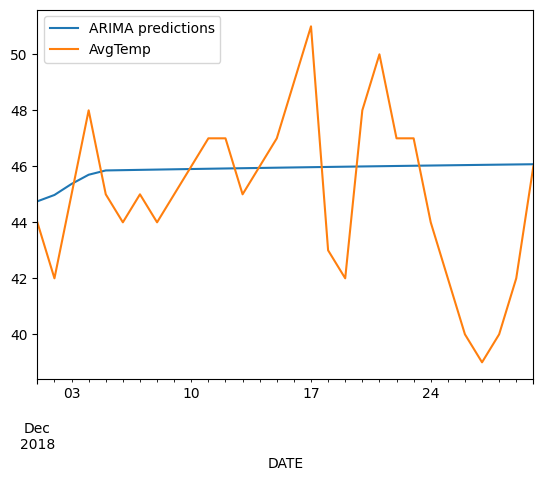

In [18]:
# make predictions on testing data
start = len(train)
end = len(train) + len(test) - 1

# plot predictions
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [19]:
test['AvgTemp'].mean()

45.0

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

2.9981148617520814


In [21]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754
